In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
sns.set_style('darkgrid', rc={'ytick.left' : True})
pal = sns.color_palette(palette='icefire')
primary = pal[1]
secondary = pal[5]
highlight = pal[0]

In [40]:
def twin_plot(df):
    fig, ax = plt.subplots()

    sns.barplot(df, x='power', y='energy', label='Energy', color=primary, ax=ax)
    ax2 = ax.twinx()
    sns.lineplot(x=range(len(df)), y=df['runtime'], label='Runtime', linewidth=2.5, color=secondary, ax=ax2)

    for bar in ax.patches:
        if bar.get_height() == df['energy'].min():
            bar.set_color(highlight)
            break

    plt.tight_layout()
    plt.show()

In [50]:
def plot(path):
    df = pd.read_csv(path, names=['name', 'size', 'power', 'powersd', 'runtime', 'runtimesd', 'energy', 'energysd'])

    for (name, size), group in df.groupby(['name', 'size']):
        print(name, size)
        twin_plot(group)

nbody 25000


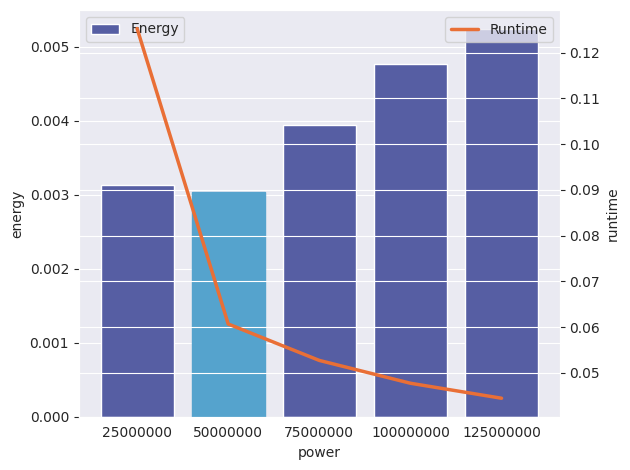

In [51]:
plot('results_sel265k/nbody.csv')

stencil 10000


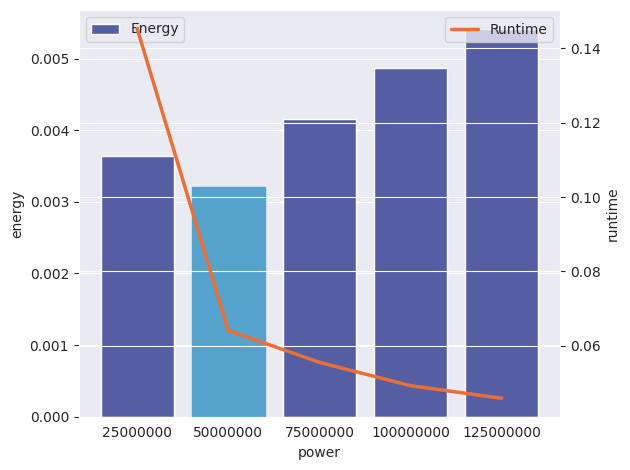

In [52]:
plot('results_sel265k/stencil.csv')

matmul 1500


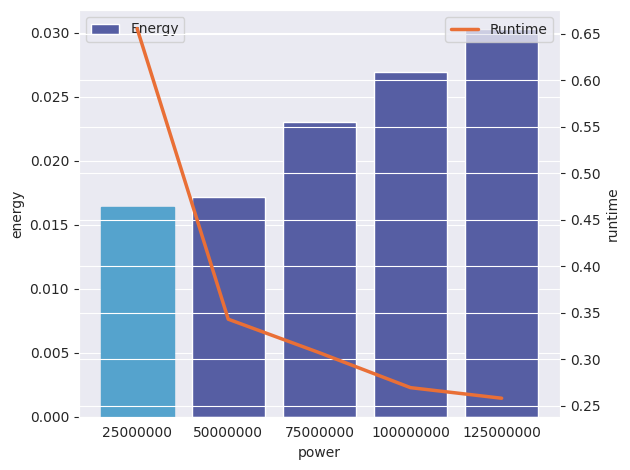

transp 1500


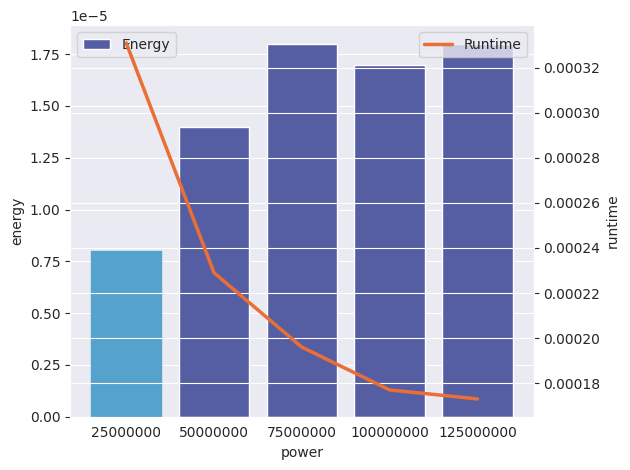

In [53]:
plot('results_sel265k/matmul.csv')

matmul_naive 1000


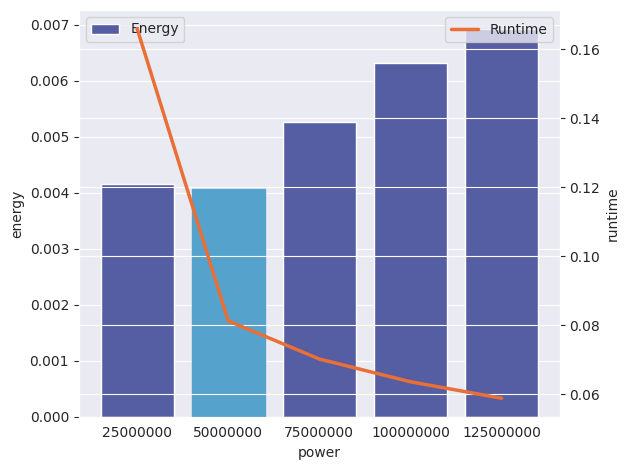

In [54]:
plot('results_sel265k/matmul_naive.csv')